# CIFAR100 Small Images Classification
with Keras

In [1]:
# import modules
from keras.datasets import cifar100
from keras.layers import Dense, Conv2D, Reshape, Flatten, Dropout, MaxPooling2D, BatchNormalization
from keras.models import Sequential
from keras.optimizers import RMSprop, Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping
import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Data Load
(x_train, y_train), (x_test, y_test) = cifar100.load_data()

x_train.shape

169001437/169001437 [==============================] - 6s 0us/step


(50000, 32, 32, 3)

In [9]:
y_train[0]

array([19])

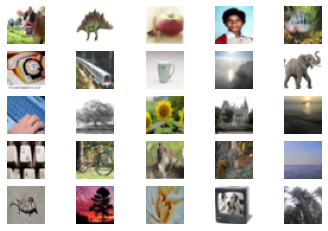

In [3]:
# Data Visualization
fig, ax = plt.subplots(5, 5)
for i in range(5):
    for j in range(5):
        ax[i][j].imshow(x_train[5*i + j])
        ax[i][j].axis('off')
plt.show()

In [4]:
# Data Preprocessing

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

print(x_train[20][14])
print(x_train.shape)

[[0.6431373  0.6431373  0.6431373 ]
 [0.60784316 0.60784316 0.6117647 ]
 [0.56078434 0.5529412  0.54509807]
 [0.4627451  0.42352942 0.38039216]
 [0.47058824 0.43529412 0.38039216]
 [0.44705883 0.4117647  0.39215687]
 [0.56078434 0.5137255  0.4862745 ]
 [0.7019608  0.6627451  0.6392157 ]
 [0.64705884 0.63529414 0.6039216 ]
 [0.5372549  0.49411765 0.46666667]
 [0.4627451  0.40784314 0.39215687]
 [0.4117647  0.41960785 0.41960785]
 [0.4392157  0.42745098 0.40784314]
 [0.5137255  0.5058824  0.48235294]
 [0.54901963 0.5137255  0.49803922]
 [0.5019608  0.49803922 0.49411765]
 [0.7019608  0.7058824  0.72156864]
 [0.57254905 0.5882353  0.6117647 ]
 [0.5019608  0.52156866 0.5529412 ]
 [0.49803922 0.5058824  0.50980395]
 [0.44705883 0.3764706  0.31764707]
 [0.6627451  0.57254905 0.4862745 ]
 [0.5568628  0.43529412 0.36078432]
 [0.5568628  0.5019608  0.4745098 ]
 [0.58431375 0.58431375 0.56078434]
 [0.6039216  0.6039216  0.56078434]
 [0.61960787 0.6156863  0.5647059 ]
 [0.6        0.5882353  0.56

In [ ]:
tr_datagen = ImageDataGenerator(
        rescale=1./255, validation_split=0.2)

flow_tr_gen = tr_datagen.flow(x_train, y_train, batch_size=batch_size, shuffle=True, subset='training')
flow_val_gen = tr_datagen.flow(x_train, y_train, batch_size=batch_size, shuffle=True, subset='validation')

In [5]:
# Create Model

batch_size = 128

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.4))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dropout(0.4))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(100, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 30, 30, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                        

In [32]:
# Model Compile and Training

es_call = EarlyStopping(monitor='val_loss', mode='min', patience=5, verbose=1)

model.compile(optimizer=Adam(learning_rate=1e-4), loss='sparse_categorical_crossentropy', metrics=['acc'])
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=40, validation_split=0.2, callbacks=[es_call])

Epoch 1/40
313/313 [==============================] - 27s 23ms/step - loss: 0.8947 - acc: 0.7232 - val_loss: 1.8194 - val_acc: 0.5802
Epoch 2/40
313/313 [==============================] - 7s 21ms/step - loss: 0.8806 - acc: 0.7258 - val_loss: 1.8086 - val_acc: 0.5796
Epoch 3/40
313/313 [==============================] - 7s 21ms/step - loss: 0.8899 - acc: 0.7236 - val_loss: 1.8091 - val_acc: 0.5813
Epoch 4/40
313/313 [==============================] - 7s 21ms/step - loss: 0.8835 - acc: 0.7247 - val_loss: 1.8285 - val_acc: 0.5805
Epoch 5/40
313/313 [==============================] - 7s 21ms/step - loss: 0.8885 - acc: 0.7248 - val_loss: 1.8192 - val_acc: 0.5780
Epoch 6/40
313/313 [==============================] - 7s 21ms/step - loss: 0.8865 - acc: 0.7232 - val_loss: 1.8020 - val_acc: 0.5816
Epoch 7/40
313/313 [==============================] - 7s 21ms/step - loss: 0.8888 - acc: 0.7233 - val_loss: 1.8107 - val_acc: 0.5808
Epoch 8/40
313/313 [==============================] - 6s 21ms/step -

In [34]:
model.save('/content/drive/MyDrive/Colab Notebooks/Practice/Keras/CIFAR100_Keras_8.h5')

In [8]:
def Plotting(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, 'b', label='Training Accuracy')
    plt.plot(epochs, val_acc, 'bo', label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')
    plt.figure()

    plt.plot(epochs, loss, 'b', label='Training Loss')
    plt.plot(epochs, val_loss, 'bo', label='Validation Loss')
    plt.title('Trianing and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(loc='upper left')
    plt.show()

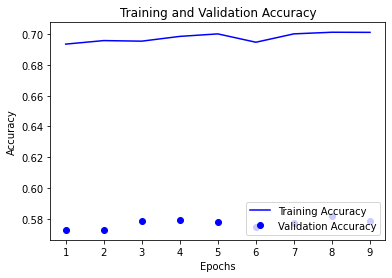

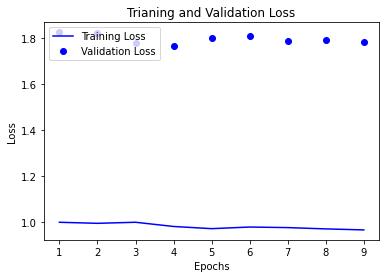

In [17]:
Plotting(history)

In [33]:
preds = model.evaluate(x_test, y_test)
print(preds)

# model 3 : 1.7743, 0.5812
# model 4 : 1.7916, 0.5752
# model 5 : 1.7839, 0.5852 (learning rate=1e-4)
# model 6 : 1.8027, 0.5839
# model 7 : 1.7896, 0.5845
# model 8 : 1.7987, 0.5857

313/313 [==============================] - 2s 7ms/step - loss: 1.7988 - acc: 0.5857
[1.7987722158432007, 0.5856999754905701]


In [42]:
# 이전의 model 8을 가지고 Fine Tuning 진행
# 마지막 Conv2D layer 위에 Conv2D layer 하나 더 쌓고 진행

import os

source_dir = '/content/drive/MyDrive/Colab Notebooks/Practice/Keras/'

load_model = keras.models.load_model(os.path.join(source_dir, 'CIFAR100_Keras_8.h5'))
load_model = Sequential(load_model.layers[:17])

for i in range(len(load_model.layers)):
    load_model.layers[i].trainable = False

load_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 30, 30, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                      

In [43]:
load_model.add(Dropout(0.4))
load_model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
load_model.add(BatchNormalization())
load_model.add(MaxPooling2D((2, 2)))
load_model.add(Flatten())
load_model.add(Dropout(0.4))
load_model.add(Dense(512, activation='relu'))
load_model.add(Dropout(0.3))
load_model.add(Dense(100, activation='softmax'))
load_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 30, 30, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                      

In [72]:
# Model Compile and Training

es_call = EarlyStopping(monitor='val_loss', mode='min', patience=3, verbose=1)

load_model.compile(optimizer=Adam(learning_rate=1e-4), loss='sparse_categorical_crossentropy', metrics=['acc'])
history = load_model.fit(x_train, y_train, batch_size=batch_size, epochs=80, validation_split=0.2, callbacks=[es_call])

Epoch 1/80
313/313 [==============================] - 5s 13ms/step - loss: 0.9107 - acc: 0.7163 - val_loss: 1.8912 - val_acc: 0.5863
Epoch 2/80
313/313 [==============================] - 4s 11ms/step - loss: 0.9217 - acc: 0.7131 - val_loss: 1.8874 - val_acc: 0.5855
Epoch 3/80
313/313 [==============================] - 3s 10ms/step - loss: 0.9269 - acc: 0.7136 - val_loss: 1.8781 - val_acc: 0.5861
Epoch 4/80
313/313 [==============================] - 3s 10ms/step - loss: 0.9186 - acc: 0.7152 - val_loss: 1.8816 - val_acc: 0.5848
Epoch 5/80
313/313 [==============================] - 3s 10ms/step - loss: 0.9120 - acc: 0.7162 - val_loss: 1.8849 - val_acc: 0.5856
Epoch 6/80
313/313 [==============================] - 4s 11ms/step - loss: 0.9236 - acc: 0.7107 - val_loss: 1.8784 - val_acc: 0.5877
Epoch 6: early stopping


In [73]:
preds = load_model.evaluate(x_test, y_test)
preds

#1 1.7738, 0.5724 (lr=5e-4, patience=16)
#2 1.7716, 0.5849 (lr=2.5e-4, patience=10)
#3 1.7901, 0.5889
#4 1.8013, 0.5928
#5 1.8077, 0.5935 (lr=1e-4, patience=5)
#6 1.8194, 0.5922 
#7 1.8266, 0.5936
#8 1.8256, 0.5952 (patience=3)
#9 1.8288, 0.5953
#10 1.8282, 0.5920
#11 1.8284, 0.5957
#12 1.8319, 0.5924

313/313 [==============================] - 1s 5ms/step - loss: 1.8311 - acc: 0.5924


[1.8310847282409668, 0.5924000144004822]

In [71]:
model.save('/content/drive/MyDrive/Colab Notebooks/Practice/Keras/CIFAR100_Keras_load11.h5')

In [14]:
import cv2
import os
import numpy as np

source_dir = "/content/drive/MyDrive/Colab Notebooks/Practice/Keras"

test_data = []
for i in range(1, 41):
    img = cv2.imread(os.path.join(source_dir, "CIFAR100_Test_data", f"{i}.jpg"))
    res = cv2.resize(img, dsize=(32, 32), interpolation=cv2.INTER_NEAREST)
    imgRGB = cv2.cvtColor(res, cv2.COLOR_BGR2RGB)
    test_data.append(imgRGB)

test_label = []

with open(os.path.join(source_dir, "CIFAR100_Test_label", "label.txt"), "r") as f:
    for line in f.readlines():
        test_label.append(int(line.rstrip()))

test_data = np.asarray(test_data).astype('float32') / 255
test_label = np.array(test_label)

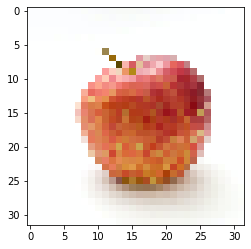

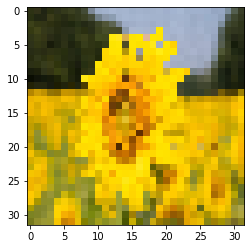

In [22]:
plt.imshow(test_data[0])
plt.figure()
plt.imshow(test_data[11])
plt.show()

In [18]:
final_model = keras.models.load_model(os.path.join(source_dir, 'CIFAR100_Keras_Final_2.h5'))

preds = final_model.evaluate(test_data, test_label)
preds

2/2 [==============================] - 7s 130ms/step - loss: 7.7235 - acc: 0.1750


[7.723480224609375, 0.17499999701976776]

In [20]:
preds = final_model.predict(test_data)
print(np.argmax(preds, axis=1))
print(test_label)

2/2 [==============================] - 0s 6ms/step
[32 26 88 33 39 78  5 66 42 74  6 82  8 26 60 71 42 42  7 39 84 12 12 14
 49 42 44 51 67 75 42 14 66 88 88 88 33 33 53 70]
[ 0  0 86 86 90 90 28 28 31 31 82 82 17 17 71 71  8  8 70 70 87 87 78 78
 49 49 11 11 73 73 14 14 20 20 36 36 33 33 53 53]


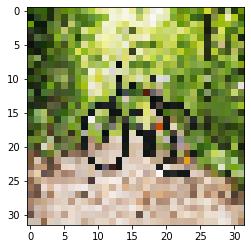

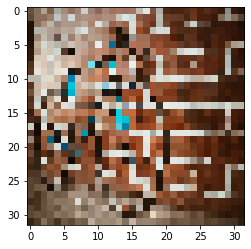

In [33]:
plt.imshow(test_data[16])
plt.figure()
plt.imshow(test_data[17])